In [11]:
import pandas as pd
import sys
import subprocess
from vega import VegaLite

In [2]:
COGmetaloc='./cog_gisaid-all.csv'

cogMetafull=pd.read_csv(COGmetaloc)
adm1List=cogMetafull['adm1'].unique()

/mnt/DataStorage/LinuxProgs/miniconda/envs/vega/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
lineageFrame=pd.read_csv('./cog_global_2020-05-29_metadata.csv')
countries=['UK-SCT','UK-ENG','UK-WLS','UK-NIR']
uklineageFrame=lineageFrame[lineageFrame['country']=='UK']

/mnt/DataStorage/LinuxProgs/miniconda/envs/vega/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
uklineageFrame

sequence_name sample_date  epi_week country    adm1  \
15251  England/NORT-291EBD/2020  2020-05-06      19.0      UK  UK-ENG   
15252  England/NORT-292001/2020  2020-05-07      19.0      UK  UK-ENG   
15253  England/NORT-292317/2020  2020-05-09      19.0      UK  UK-ENG   
15254  England/NORT-28ABDE/2020  2020-04-15      16.0      UK  UK-ENG   
15255  England/NORT-292678/2020  2020-05-13      20.0      UK  UK-ENG   
...                         ...         ...       ...     ...     ...   
34286       Scotland/CVR04/2020  2020-03-04      10.0      UK  UK-SCT   
34287       Scotland/CVR05/2020  2020-03-04      10.0      UK  UK-SCT   
34288       Scotland/CVR03/2020  2020-03-01      10.0      UK  UK-SCT   
34289       Scotland/CVR02/2020  2020-03-02      10.0      UK  UK-SCT   
34290       Scotland/CVR01/2020  2020-02-28       9.0      UK  UK-SCT   

                  adm2  outer_postcode  is_surveillance  is_community  is_hcw  \
15251          CUMBRIA             NaN              NaN           NaN     NaN   
15252          CUMBRIA             NaN              NaN           NaN     NaN   
15253          CUMBRIA             NaN              NaN           NaN     NaN   
15254  NORTH YORKSHIRE             NaN              NaN           NaN     NaN   
15255          CUMBRIA             NaN              NaN           NaN     NaN   
...                ...             ...              ...           ...     ...   
34286          FALKIRK             NaN              NaN           NaN     NaN   
34287         ABERDEEN             NaN              NaN           NaN     NaN   
34288         ABERDEEN             NaN              NaN           NaN     NaN   
34289       KILMARNOCK             NaN              NaN           NaN     NaN   
34290           DUNDEE             NaN              NaN           NaN     NaN   

       is_travel_history travel_history  lineage  lineage_support uk_lineage  \
15251                NaN            NaN    B.1.1             95.0      UK203   
15252                NaN            NaN    B.1.1            100.0        UK5   
15253                NaN            NaN    B.1.1            100.0        UK5   
15254                NaN            NaN      B.1             94.0       UK36   
15255                NaN            NaN  B.1.1.1             99.0        UK5   
...                  ...            ...      ...              ...        ...   
34286                NaN            NaN        B            100.0     UK1181   
34287                NaN            NaN      B.1             97.0       UK11   
34288                NaN            NaN      B.1            100.0     UK5050   
34289                NaN            NaN        B            100.0     UK1182   
34290                NaN            NaN    B.1.1             96.0     UK4365   

      acc_lineage del_lineage            phylotype  
15251   B.1.X_404   B.1.X_861          UK203_1.1.1  
15252  B.1.X_2477   B.1.X_410      UK5_1.1.1.2.1.1  
15253  B.1.X_2477   B.1.X_410  UK5_1.1.1.2.1.1.1.1  
15254    B.1_1308     B.1_382               UK36_1  
15255  B.1.X_2477   B.1.X_410        UK5_1.1.1.2.2  
...           ...         ...                  ...  
34286       B_188       B_214                  NaN  
34287     B.1_595     B.1_613               UK11_1  
34288     B.1_742     B.1_760             UK5050_1  
34289       B_187       B_213                  NaN  
34290   B.1.X_548  B.1.X_1005                  NaN  

[19040 rows x 18 columns]

In [8]:
for each,countrydf in uklineageFrame.groupby(['adm1']):
    print(each)
    countrytop10=countrydf['uk_lineage'].value_counts()[:10].to_frame()
    countrytop10=countrytop10.reset_index()
    countrytop10.columns=['UK_Lineage','Count']
    json10=countrytop10.to_json(orient='records')
    #countrytop10.columns()
         # .to_json(orient='records')



UK-ENG
UK-NIR
UK-SCT
UK-WLS


In [6]:
DF=cogMetafull.loc[cogMetafull['adm1']=='UK-SCT']

In [7]:
DF

adm0    adm1                    adm2 biosample_source_id  \
21      UK  UK-SCT                     NaN                 NaN   
22      UK  UK-SCT  PERTHSHIRE AND KINROSS                 NaN   
23      UK  UK-SCT                     NaN                 NaN   
24      UK  UK-SCT                     NaN                 NaN   
25      UK  UK-SCT                  DUNDEE                 NaN   
...    ...     ...                     ...                 ...   
19485   UK  UK-SCT                 FALKIRK                 NaN   
19486   UK  UK-SCT                ABERDEEN                 NaN   
19487   UK  UK-SCT                ABERDEEN                 NaN   
19488   UK  UK-SCT              KILMARNOCK                 NaN   
19489   UK  UK-SCT                  DUNDEE                 NaN   

      central_sample_id collection_date flowcell_id flowcell_type  \
21              EDB5110      2020-03-31         NaN           NaN   
22              EDB3069      2020-04-04         NaN           NaN   
23              EDB5107      2020-03-31         NaN           NaN   
24              EDB5104      2020-03-30         NaN           NaN   
25              EDB4180      2020-04-20         NaN           NaN   
...                 ...             ...         ...           ...   
19485             CVR04      2020-03-04         NaN           NaN   
19486             CVR05      2020-03-04         NaN           NaN   
19487             CVR03      2020-03-01         NaN           NaN   
19488             CVR02      2020-03-02         NaN           NaN   
19489             CVR01      2020-02-28         NaN           NaN   

       instrument_make instrument_model  ...  swab_site  \
21     OXFORD_NANOPORE          GridION  ...        NaN   
22     OXFORD_NANOPORE          GridION  ...        NaN   
23     OXFORD_NANOPORE          GridION  ...        NaN   
24     OXFORD_NANOPORE          GridION  ...        NaN   
25     OXFORD_NANOPORE          GridION  ...        NaN   
...                ...              ...  ...        ...   
19485  OXFORD_NANOPORE           MinION  ...        NaN   
19486  OXFORD_NANOPORE           MinION  ...        NaN   
19487  OXFORD_NANOPORE           MinION  ...        NaN   
19488  OXFORD_NANOPORE           MinION  ...        NaN   
19489  OXFORD_NANOPORE           MinION  ...        NaN   

                                                  header  \
21     COG-UK/EDB5110/EDIN:20200520_1353_X2_FAN44083_...   
22     COG-UK/EDB3069/EDIN:20200520_1353_X2_FAN44083_...   
23     COG-UK/EDB5107/EDIN:20200520_1353_X2_FAN44083_...   
24     COG-UK/EDB5104/EDIN:20200520_1353_X2_FAN44083_...   
25     COG-UK/EDB4180/EDIN:20200520_1353_X2_FAN44083_...   
...                                                  ...   
19485  hCoV-19/Scotland/CVR04/2020|EPI_ISL_414026|Sco...   
19486  hCoV-19/Scotland/CVR05/2020|EPI_ISL_414027|Sco...   
19487  hCoV-19/Scotland/CVR03/2020|EPI_ISL_414025|Sco...   
19488  hCoV-19/Scotland/CVR02/2020|EPI_ISL_414024|Sco...   
19489  hCoV-19/Scotland/CVR01/2020|EPI_ISL_413221|Sco...   

               sequence_name length missing      gaps   cov_id subsample_omit  \
21     Scotland/EDB5110/2020  29782     292  0.009805  EDB5110          False   
22     Scotland/EDB3069/2020  29782     510  0.017124  EDB3069          False   
23     Scotland/EDB5107/2020  29782     294  0.009872  EDB5107          False   
24     Scotland/EDB5104/2020  29782     292  0.009805  EDB5104          False   
25     Scotland/EDB4180/2020  29782     510  0.017124  EDB4180          False   
...                      ...    ...     ...       ...      ...            ...   
19485    Scotland/CVR04/2020  29782     558  0.018736    CVR04          False   
19486    Scotland/CVR05/2020  29782       0  0.000000    CVR05          False   
19487    Scotland/CVR03/2020  29782     362  0.012155    CVR03          False   
19488    Scotland/CVR02/2020  29782     557  0.018703    CVR02          False   
19489    Scotland/CVR01/2020  29782     268  0.008999    CVR01 

In [16]:
from IPython.display import display
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

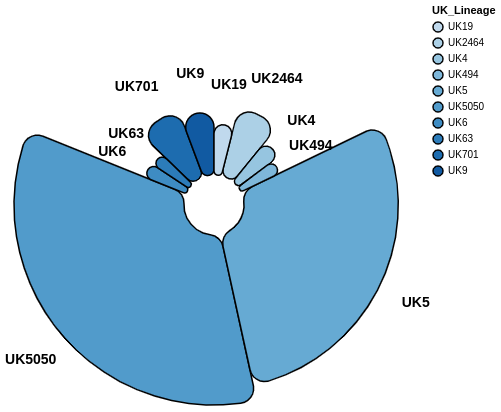

In [46]:
VegaLite(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "A simple radial chart with embedded data.",
  "height":400,
  "width":400,
  "data": {
    "values": [
      {"UK_Lineage":"UK5050","Count":1200},
      {"UK_Lineage":"UK5","Count":1000},
      {"UK_Lineage":"UK701","Count":244},
      {"UK_Lineage":"UK2464","Count":240},
      {"UK_Lineage":"UK9","Count":199},
      {"UK_Lineage":"UK4","Count":138},
      {"UK_Lineage":"UK19","Count":137},
      {"UK_Lineage":"UK6","Count":112},
      {"UK_Lineage":"UK494","Count":105},
      {"UK_Lineage":"UK63","Count":103}
    ]
  },
  "layer": [{
    "mark": {"type": "arc", "innerRadius": 30, "cornerRadius":15,"padAngle":0.00, "stroke": "black","strokeWidth":1.5}
  },{
    "mark": {"type": "text", "radiusOffset": 40,  "fill":"black", "fontWeight":"bold", "fontSize":14},
    "encoding": { 
      "text": {"field": "UK_Lineage", "type": "nominal"
     }
    }
  }
],
  "encoding": {
    "theta": {"field": "Count", "type": "quantitative", "stack": True},
    "radius": {"field": "Count", "type": "quantitative", "scale": {"type": "sqrt", "zero": True, "range": [20, 200]}},
    "color": {"field": "UK_Lineage", "type": "nominal", "scale":{"scheme":"blues"}
    }
  },
  "view": {"stroke": False}

}
)

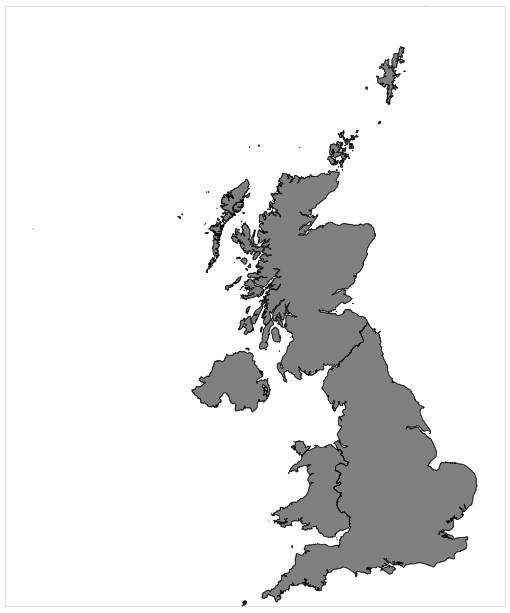

In [90]:
VegaLite(
{
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "width": 500,
    "height": 600,
    "layer": [
        {
            "data": {
                "url": "./gadm36_GBR_1.topo",
                "format": {
                    "type":"topojson",
                    "feature":"gadm36_GBR_1"
                }
            },
    "projection": {
        "type":"mercator"
    },
    "mark": {
        "type":"geoshape",
        "fill":"grey",
        "stroke":"black"
    },
},
        "data": {
            "url": "./gadm36_GBR_1.topo",
            "format": {
                "type":"topojson",
                "feature": "gadm36_GBR_1"
            }
        },
        "transform": [
            {
                "filter": {
                    "field": ""
                }
            }
        ]
]

}
)

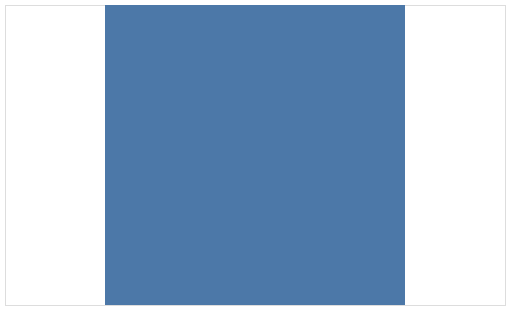

In [74]:
VegaLite(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 500,
  "height": 300,
  "data": {
    "url": "https://opendata.arcgis.com/datasets/686603e943f948acaa13fb5d2b0f1275_3.geojson",
    "format": {"property": "features"}
  },
  "transform": [
    {
      "filter": {
        "field": "properties.lad16nm",
        "oneOf": [
          "Bolton",
          "Bury",
          "Manchester",
          "Oldham",
          "Rochdale",
          "Salford",
          "Stockport",
          "Tameside",
          "Trafford",
          "Wigan"
        ]
      }
    }
  ],
  "projection": {"type": "mercator"},
  "mark": "geoshape"
}
)

In [ ]:
Javascript Error: Invalid specification {"data":{"url":"./gadm36_GBR_1.topo","format":{"type":"topojson","feature":"gadm36_GBR_1"}},"projection":{"type":"mercator"}}. Make sure the specification includes at least one of the following properties: "mark", "layer", "facet", "hconcat", "vconcat", "concat", or "repeat".
